In [1]:
# grafics.py

import pandas as pd
import seaborn as sns

In [20]:
# bsr_df = pd.read_csv("../bsr_df.csv")
# bsr_tfidf = pd.read_csv("../bsr_tfidf.csv")
# tcr_df = pd.read_csv("../tcr_df.csv")
# tcr_tfidf = pd.read_csv("../tcr_tfidf.csv")

# dados = pd.concat([
#     bsr_df,
#     bsr_tfidf,
#     tcr_df,
#     tcr_tfidf
# ])

dados = pd.read_csv("../serial_concurrent_3datasets.csv")

dados.Score = dados.Score.str.replace(',', '.').astype(float)
dados.Benchmark = dados.Benchmark.str.removeprefix("jv.microbenchmark.runners.runner.")
dados["Class"] = dados.Benchmark.str.split("Runner.").str[0]
dados["Benchmark"] = dados.Benchmark.str.split("Runner.").str[1]
dados.dropna(subset = ['Score'], inplace=True) 
replace_dataset = {"devel_100_000_id":"45.2 MB", "test_id":"177.9 MB", "train_id":"1.6 GB"}
replace_string = {"foreach_java":"Java", "foreach_apache":"Apache"}
dados["Dataset"] = dados["Param: dataset"].replace(replace_dataset)
dados["String"] = dados["Param: stringManipulation"].replace(replace_string)
dados.drop(["Param: dataset", "Param: stringManipulation"], axis=1, inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Benchmark            256 non-null    object 
 1   Mode                 256 non-null    object 
 2   Threads              256 non-null    int64  
 3   Samples              256 non-null    int64  
 4   Score                256 non-null    float64
 5   Score Error (99,9%)  208 non-null    object 
 6   Unit                 256 non-null    object 
 7   Class                256 non-null    object 
 8   Dataset              256 non-null    object 
 9   String               256 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 20.1+ KB


In [31]:
dados

,Benchmark,Mode,Threads,Samples,Score,"Score Error (99,9%)",Unit,Class,Dataset,String
0,compute_df,thrpt,1,10,2.187660e-01,"0,001142",ops/s,BasicSerial,45.2 MB,Java
1,compute_df:·gc.alloc.rate,thrpt,1,10,2.645699e+02,"1,476049",MB/sec,BasicSerial,45.2 MB,Java
2,compute_df:·gc.alloc.rate.norm,thrpt,1,10,1.337393e+09,"294,709883",B/op,BasicSerial,45.2 MB,Java
3,compute_df:·gc.churn.G1_Eden_Space,thrpt,1,10,2.506846e+02,"1,370743",MB/sec,BasicSerial,45.2 MB,Java
4,compute_df:·gc.churn.G1_Eden_Space.norm,thrpt,1,10,1.267204e+09,"373658,153967",B/op,BasicSerial,45.2 MB,Java
...,...,...,...,...,...,...,...,...,...,...
251,compute_tfidf:·gc.churn.G1_Old_Gen.norm,thrpt,1,10,6.073498e+06,"18311828,727427",B/op,ThreadConcurrent,1.6 GB,Apache
252,compute_tfidf:·gc.churn.G1_Survivor_Space,thrpt,1,10,8.742880e-01,"0,880411",MB/sec,ThreadConcurrent,1.6 GB,Apache
253,compute_tfidf:·gc.churn.G1_Survivor_Space.norm,thrpt,1,10,3.343494e+07,"33862152,783032",B/op,ThreadConcurrent,1.6 GB,Apache
254,compute_tfidf:·gc.count,thrpt,1,10,4.090000e+02,NaN,counts,ThreadConcurrent,1.6 GB,Apache


In [21]:
alvos=set(["compute_df", "compute_tfidf"])
dados[dados["Benchmark"].isin(alvos)][["Class","Benchmark", "Score", "String"]]

,Class,Benchmark,Score,String
0,BasicSerial,compute_df,0.218766,Java
9,BasicSerial,compute_df,0.384997,Apache
18,BasicSerial,compute_df,0.055814,Java
27,BasicSerial,compute_df,0.089774,Apache
36,BasicSerial,compute_df,0.006158,Java
47,BasicSerial,compute_df,0.009683,Apache
58,BasicSerial,compute_tfidf,0.209675,Java
69,BasicSerial,compute_tfidf,0.368917,Apache
80,BasicSerial,compute_tfidf,0.054519,Java
91,BasicSerial,compute_tfidf,0.085010,Apache


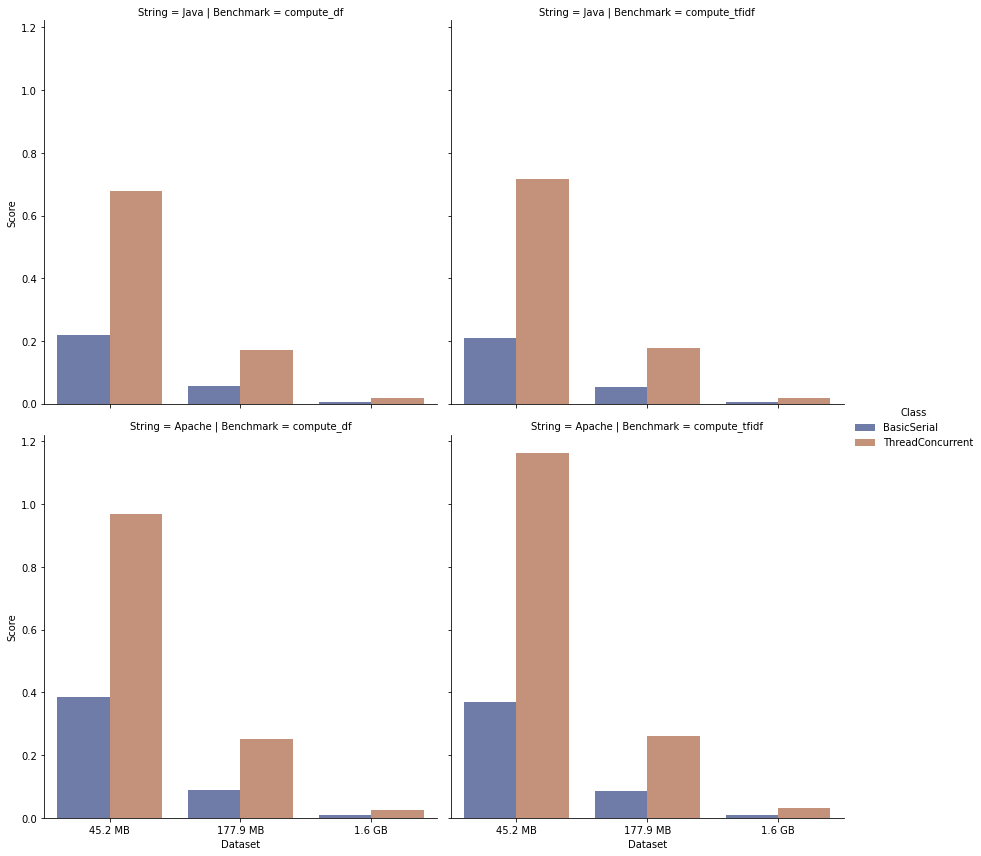

In [35]:
alvos=set(["compute_df", "compute_tfidf"])
g = sns.catplot(
    data=dados[dados["Benchmark"].isin(alvos)], kind="bar",
    col="Benchmark", row="String",
    x="Dataset", y="Score", hue="Class",
    ci="sd", palette="dark", alpha=.6, height=6, sharey=True,
    # order=['BasicSerial', 'ThreadConcurrent']
)

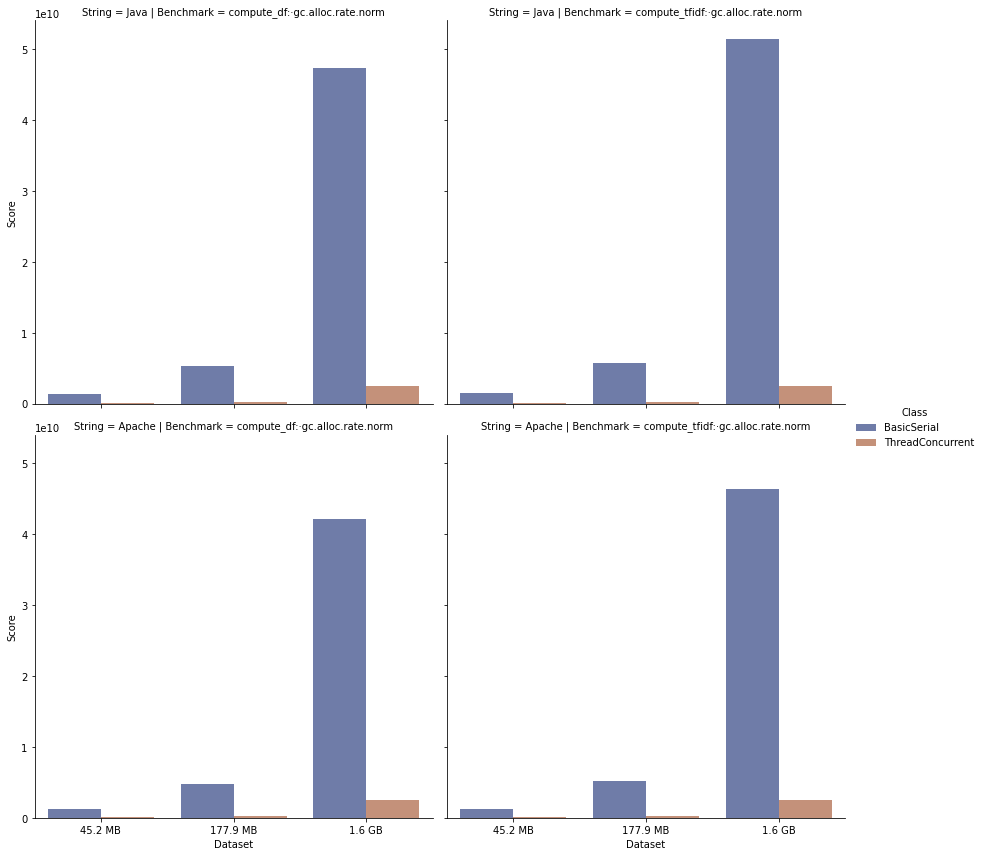

In [34]:
alvos=set(["compute_df:·gc.alloc.rate.norm", "compute_tfidf:·gc.alloc.rate.norm"])
g = sns.catplot(
    data=dados[dados["Benchmark"].isin(alvos)], kind="bar",
    col="Benchmark", row="String",
    x="Dataset", y="Score", hue="Class",
    ci="sd", palette="dark", alpha=.6, height=6, sharey=True,
    # order=['BasicSerial', 'ThreadConcurrent']
)